<a href="https://colab.research.google.com/github/Hussein-Ahmad-94/Tasks/blob/main/feature_engineering_mts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

In [ ]:
# Generate sample multivariate time series data
np.random.seed(42)
n_samples = 100
n_features = 3
date_rng = pd.date_range(start='2022-01-01', end='2022-04-10', freq='D')
data = np.random.randn(n_samples, n_features)
df = pd.DataFrame(data, columns=['Feature1', 'Feature2', 'Feature3'], index=date_rng)

In [ ]:
df

,Feature1,Feature2,Feature3
2022-01-01,0.496714,-0.138264,0.647689
2022-01-02,1.523030,-0.234153,-0.234137
2022-01-03,1.579213,0.767435,-0.469474
2022-01-04,0.542560,-0.463418,-0.465730
2022-01-05,0.241962,-1.913280,-1.724918
...,...,...,...
2022-04-06,-1.952088,-0.151785,0.588317
2022-04-07,0.280992,-0.622700,-0.208122
2022-04-08,-0.493001,-0.589365,0.849602
2022-04-09,0.357015,-0.692910,0.899600


In [ ]:
# Function to create lag features
def create_lag_features(data, lag):
    for feature in data.columns:
        data[f'{feature}_lag_{lag}'] = data[feature].shift(lag)
    return data

# Function to create rolling statistics features
def create_rolling_features(data, window):
    for feature in data.columns:
        data[f'{feature}_rolling_mean_{window}'] = data[feature].rolling(window=window).mean()
        data[f'{feature}_rolling_std_{window}'] = data[feature].rolling(window=window).std()
    return data

In [ ]:
# Create lag and rolling features
df = create_lag_features(df, lag=1)
df = create_rolling_features(df, window=3)

In [ ]:
df

,Feature1,Feature2,Feature3,Feature1_lag_1,Feature2_lag_1,Feature3_lag_1,Feature1_rolling_mean_3,Feature1_rolling_std_3,Feature2_rolling_mean_3,Feature2_rolling_std_3,Feature3_rolling_mean_3,Feature3_rolling_std_3,Feature1_lag_1_rolling_mean_3,Feature1_lag_1_rolling_std_3,Feature2_lag_1_rolling_mean_3,Feature2_lag_1_rolling_std_3,Feature3_lag_1_rolling_mean_3,Feature3_lag_1_rolling_std_3
2022-01-01,0.496714,-0.138264,0.647689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-02,1.523030,-0.234153,-0.234137,0.496714,-0.138264,0.647689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-03,1.579213,0.767435,-0.469474,1.523030,-0.234153,-0.234137,1.199652,0.609410,0.131672,0.552670,-0.018641,0.588933,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-04,0.542560,-0.463418,-0.465730,1.579213,0.767435,-0.469474,1.214934,0.582970,0.023288,0.654566,-0.389780,0.134804,1.199652,0.609410,0.131672,0.552670,-0.018641,0.588933
2022-01-05,0.241962,-1.913280,-1.724918,0.542560,-0.463418,-0.465730,0.787912,0.701575,-0.536421,1.341848,-0.886707,0.725914,1.214934,0.582970,0.023288,0.654566,-0.389780,0.134804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-06,-1.952088,-0.151785,0.588317,1.586017,-1.237815,2.133033,-0.250462,1.772903,-0.425361,0.716001,1.127827,0.871316,0.466588,1.012529,-0.574838,0.676024,0.954989,1.062335
2022-04-07,0.280992,-0.622700,-0.208122,-1.952088,-0.151785,0.588317,-0.028360,1.789223,-0.670767,0.544608,0.837743,1.190341,-0.250462,1.772903,-0.425361,0.716001,1.127827,0.871316
2022-04-08,-0.493001,-0.589365,0.849602,0.280992,-0.622700,-0.208122,-0.721366,1.133920,-0.454616,0.262789,0.409932,0.550964,-0.028360,1.789223,-0.670767,0.544608,0.837743,1.190341
2022-04-09,0.357015,-0.692910,0.899600,-0.493001,-0.589365,0.849602,0.048335,0.470350,-0.634991,0.052855,0.513693,0.625610,-0.721366,1.133920,-0.454616,0.262789,0.409932,0.550964


In [ ]:
# Drop rows with NaN values due to feature engineering
df = df.dropna()

In [ ]:
df.shape

(97, 18)

In [ ]:
# Separate features and target variable
X = df.drop('Feature1', axis=1)  # Features
y = df['Feature1']  # Target variable

In [ ]:
X

,Feature2,Feature3,Feature1_lag_1,Feature2_lag_1,Feature3_lag_1,Feature1_rolling_mean_3,Feature1_rolling_std_3,Feature2_rolling_mean_3,Feature2_rolling_std_3,Feature3_rolling_mean_3,Feature3_rolling_std_3,Feature1_lag_1_rolling_mean_3,Feature1_lag_1_rolling_std_3,Feature2_lag_1_rolling_mean_3,Feature2_lag_1_rolling_std_3,Feature3_lag_1_rolling_mean_3,Feature3_lag_1_rolling_std_3
2022-01-04,-0.463418,-0.465730,1.579213,0.767435,-0.469474,1.214934,0.582970,0.023288,0.654566,-0.389780,0.134804,1.199652,0.609410,0.131672,0.552670,-0.018641,0.588933
2022-01-05,-1.913280,-1.724918,0.542560,-0.463418,-0.465730,0.787912,0.701575,-0.536421,1.341848,-0.886707,0.725914,1.214934,0.582970,0.023288,0.654566,-0.389780,0.134804
2022-01-06,-1.012831,0.314247,0.241962,-1.913280,-1.724918,0.074078,0.571236,-1.129843,0.731980,-0.625467,1.028924,0.787912,0.701575,-0.536421,1.341848,-0.886707,0.725914
2022-01-07,-1.412304,1.465649,-0.562288,-1.012831,0.314247,-0.409450,0.590031,-1.446138,0.451177,0.018326,1.615737,0.074078,0.571236,-1.129843,0.731980,-0.625467,1.028924
2022-01-08,0.067528,-1.424748,-0.908024,-1.412304,1.465649,-0.565363,0.341134,-0.785869,0.765578,0.118383,1.455119,-0.409450,0.590031,-1.446138,0.451177,0.018326,1.615737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-06,-0.151785,0.588317,1.586017,-1.237815,2.133033,-0.250462,1.772903,-0.425361,0.716001,1.127827,0.871316,0.466588,1.012529,-0.574838,0.676024,0.954989,1.062335
2022-04-07,-0.622700,-0.208122,-1.952088,-0.151785,0.588317,-0.028360,1.789223,-0.670767,0.544608,0.837743,1.190341,-0.250462,1.772903,-0.425361,0.716001,1.127827,0.871316
2022-04-08,-0.589365,0.849602,0.280992,-0.622700,-0.208122,-0.721366,1.133920,-0.454616,0.262789,0.409932,0.550964,-0.028360,1.789223,-0.670767,0.544608,0.837743,1.190341
2022-04-09,-0.692910,0.899600,-0.493001,-0.589365,0.849602,0.048335,0.470350,-0.634991,0.052855,0.513693,0.625610,-0.721366,1.133920,-0.454616,0.262789,0.409932,0.550964


In [ ]:
# Use Random Forest to select important features
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

RandomForestRegressor(random_state=42)

In [ ]:
# Extract feature importances
feature_importances = rf.feature_importances_

In [ ]:
# Select important features based on a threshold
sfm = SelectFromModel(rf, threshold=0.1)
sfm.fit(X, y)
selected_features = X.columns[sfm.get_support()]

In [ ]:
# Display selected features
print("Selected Features:", selected_features)


Selected Features: Index(['Feature1_rolling_mean_3', 'Feature1_lag_1_rolling_mean_3'], dtype='object')


# Darts

In [ ]:
pip install darts pandas numpy scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 817.6/817.6 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 15.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.4/110.4 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 777.7/777.7 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.1/806.1 kB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 279.8/279.8 kB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.2/169.2

In [ ]:
import pandas as pd
import numpy as np
from darts import TimeSeries
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

In [ ]:
# Generate sample multivariate time series data using Darts
np.random.seed(42)
n_samples = 100
n_features = 3
date_rng = pd.date_range(start='2022-01-01', end='2022-04-10', freq='D')
data = np.random.randn(n_samples, n_features)
df = pd.DataFrame(data, columns=['Feature1', 'Feature2', 'Feature3'], index=date_rng)


In [ ]:
# Function to create lag features using Darts
def create_lag_features_darts(series, lag):
    for feature in series.columns:
        series[f'{feature}_lag_{lag}'] = series[feature].shift(lag)
    return series

# Function to create rolling statistics features using Darts
def create_rolling_features_darts(series, window):
    for feature in series.columns:
        series[f'{feature}_rolling_mean_{window}'] = series[feature].rolling_mean(window)
        series[f'{feature}_rolling_std_{window}'] = series[feature].rolling_std(window)
    return series

In [ ]:
# Drop NaN values due to feature engineering
df = df.dropna()

In [ ]:
# Separate features and target variable
X = df.drop('Feature1', axis=1)  # Features
y = df['Feature1']  # Target variable

In [ ]:
# Use Random Forest to select important features
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X.values, y.values)

RandomForestRegressor(random_state=42)

In [ ]:
# Extract feature importances
feature_importances = rf.feature_importances_

In [ ]:
# Select important features based on a threshold
sfm = SelectFromModel(rf, threshold=0.1)
sfm.fit(X.values, y.values)
selected_features = X.columns[sfm.get_support()]

In [ ]:
# Display selected features
print("Selected Features:", selected_features)

Selected Features: Index(['Feature2', 'Feature3'], dtype='object')


# Explainability

In [ ]:
import shap
import matplotlib.pyplot as plt

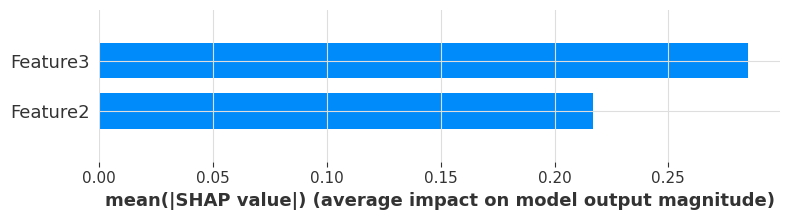

In [ ]:
# Use SHAP to explain the model's predictions
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X.values)

# Plot the most important feature using summary_plot
shap.summary_plot(shap_values, X, feature_names=X.columns, plot_type='bar')
plt.show()